<a href="https://colab.research.google.com/github/jacksonmcewan/voting-data/blob/main/McEwan_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello and welcome to my final project! In this Colab notebook you will find code and brief documentation that assesses the relationship betweeen various indicators across states and their voting data, as well as models that predict voting habits.

The goal is to put together several data sources, visualizations, and machine learning models in order to predict the relationships among explanatory variables, and use these variables and models to make predictions about individual voting habits.

With that, let's load in the data.

**STATE-SPECIFIC DATA ANALYSIS**

In [ ]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pydot

# visualizing state data
import plotly
import plotly.express as px

# logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# decision tree/random forest
from xlrd.xlsx import X12SST
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

# warning removal for readability
import warnings
warnings.filterwarnings("ignore")


First, I want to focus on state-specific data. The following four datasets are from different sources -- listed in the project documentation -- and have been merged into a single dataframe in order to construct visualizations and comparisons from state-specific data.

In [ ]:
# loading, manipulating, merging data
googleQueries = pd.read_excel('googleQueries.xlsx')
googleQueries = googleQueries.drop('region', axis=1)

income = pd.read_excel('inflAdjIncome.xlsx')
income = income.drop('HouseholdIncome', axis=1)
income = income.drop('Region', axis=1)
income.InflAdjIncome = income.InflAdjIncome.round(2)

poverty = pd.read_excel('poverty.xlsx')
poverty = poverty.drop('region', axis=1)

voting = pd.read_excel('voting.xlsx')

stateCodes = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID",
          "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
          "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA",
          "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

data = pd.merge(googleQueries, poverty, on="State")

data = pd.merge(data, income, on="State")
data = pd.merge(data, voting, on="State")

data['Code'] = stateCodes

data = data.rename(columns={'InflAdjIncome': 'MedianHHIncome',
                            'average 2018-2020': 'PovertyRate',
                            'googleQueries': 'RegistrationQueries',
                            'Total population': 'TotalPopulation',
                            'Total registered': 'TotalRegistered',
                            'Percent registered\n(Total)': 'PercentRegistered',
                            'Total voted': 'TotalVoted',
                            'Percent voted\n(Total)' : 'PercentVoted'})



Now that the data is loaded in, adjusted appropriately, and merged, let's print the dataframe.

In [ ]:
data[:10]

,State,RegistrationQueries,PovertyRate,MedianHHIncome,Unnamed: 4,Unnamed: 5,Unnamed: 6,TotalPopulation,TotalRegistered,PercentRegistered,TotalVoted,PercentVoted,Code
0,ALABAMA,60,14.6,47099.02,1.1048,NaN,NaN,3769,2527,67.0,2247,59.6,AL
1,ALASKA,59,12.2,70410.93,NaN,NaN,NaN,528,383,72.6,330,62.4,AK
2,ARIZONA,87,11.2,55692.43,NaN,NaN,NaN,5638,3878,68.8,3649,64.7,AZ
3,ARKANSAS,77,14.7,44781.86,NaN,NaN,NaN,2283,1361,59.6,1186,51.9,AR
4,CALIFORNIA,69,11.0,71209.27,NaN,NaN,NaN,30342,18001,59.3,16893,55.7,CA
5,COLORADO,66,9.3,68094.68,NaN,NaN,NaN,4525,2993,66.2,2837,62.7,CO
6,CONNECTICUT,62,9.9,72280.05,NaN,NaN,1.1048,2777,1850,66.6,1681,60.5,CT
7,DELAWARE,64,8.1,62554.31,NaN,NaN,NaN,766,542,70.8,489,63.8,DE
8,FLORIDA,72,12.8,52229.36,NaN,NaN,NaN,17244,10495,60.9,9720,56.4,FL
9,GEORGIA,80,13.4,55416.36,NaN,NaN,NaN,8032,5233,65.2,4888,60.9,GA


Looks great! We can see now the results from the Google search query and the data from each dataset combined in one dataframe.

Next, we want to understand distributions and relationships between these variables. Let's construct a few choropleths to visualize distributions of the variables across states. You can hover over each state to see the exact value for each variable.

In [ ]:
# choropleth for 'RegistrationQueries'
fig1 = px.choropleth(data, locations='Code', locationmode="USA-states",
                     color='RegistrationQueries', scope="usa", title="Google Searches for Voter Registration")
fig1.show()

# choropleth for 'PovertyRate'
fig2 = px.choropleth(data, locations='Code', locationmode="USA-states", color='PovertyRate',
                     scope="usa", title="Poverty Rate")
fig2.show()

# choropleth for 'MedianHHIncome'
fig3 = px.choropleth(data, locations='Code', locationmode="USA-states", color='MedianHHIncome',
                     scope="usa", title="Median Household Income")
fig3.show()

# choropleth for 'PercentRegistered'
fig4 = px.choropleth(data, locations='Code', locationmode="USA-states", color='PercentRegistered',
                     scope="usa", title="Percent of Voters Registered")
fig4.show()

# choropleth for 'PercentVoted'
fig5 = px.choropleth(data, locations='Code', locationmode="USA-states", color='PercentVoted',
                     scope="usa", title="Percent of Voters")
fig5.show()


In the above choropleths, we can see how each of the five variables differ across U.S. states.

Next, let's look at the relationships between some of the variables using scatterplots. First, let's look at the relationship between states' median household incomes and percent of voters.

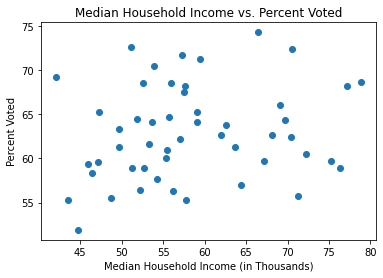


Correlation:  0.1900763051934834 



In [ ]:
# scatterplot for income vs percent voted
plt.scatter(data['MedianHHIncome']/1000, data['PercentVoted'])

plt.title("Median Household Income vs. Percent Voted")
plt.xlabel("Median Household Income (in Thousands)")
plt.ylabel("Percent Voted")

plt.show()

coef1 = np.corrcoef(data['MedianHHIncome'], data['PercentVoted'])[0,1]

print("\nCorrelation: ", coef1, "\n")


Given the above scatterplot and correlation coefficient, we see that though the association is positive, it is quite weak.

Let's look instead of poverty rate relative to percent of voters in each state.

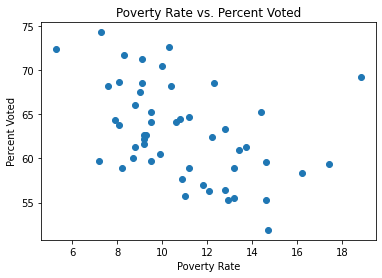


Correlation:  -0.4351938215733214 



In [ ]:
# scatterplot for poverty vs percent voted
plt.scatter(data['PovertyRate'], data['PercentVoted'])

plt.title("Poverty Rate vs. Percent Voted")
plt.xlabel("Poverty Rate")
plt.ylabel("Percent Voted")

plt.show()

coef2 = np.corrcoef(data['PovertyRate'], data['PercentVoted'])[0,1]

print("\nCorrelation: ", coef2, "\n")

We can see now that this correlation is negative, meaning states with higher poverty rates are likely to have lower rates of voting. The correelation coefficient of -0.435 is still fairly weak, but much stronger than the association with median household income.

Finally, let's look at registration queries compared to percent of state's population that is registered to vote and percent of state's population that voted in the November 2020 election.

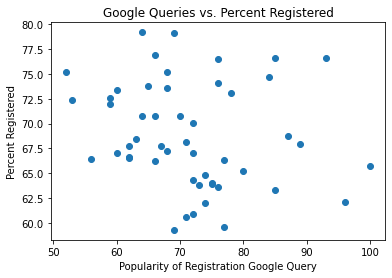

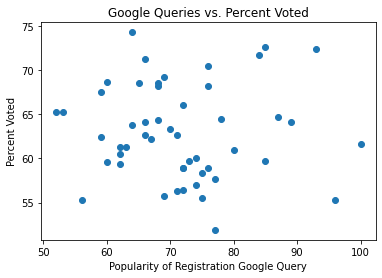


Correlation (Registered):  -0.18970525555848183
Correlation (Voted):  -0.03133020847188696 



In [ ]:
# scatterplot for Google queries vs percent registered & voted
plt.scatter(data['RegistrationQueries'], data['PercentRegistered'])

plt.title("Google Queries vs. Percent Registered")
plt.xlabel("Popularity of Registration Google Query")
plt.ylabel("Percent Registered")

plt.show()
print("\n")

plt.scatter(data['RegistrationQueries'], data['PercentVoted'])

plt.title("Google Queries vs. Percent Voted")
plt.xlabel("Popularity of Registration Google Query")
plt.ylabel("Percent Voted")

plt.show()

coef3 = np.corrcoef(data['RegistrationQueries'], data['PercentRegistered'])[0,1]
coef4 = np.corrcoef(data['RegistrationQueries'], data['PercentVoted'])[0,1]

print("\nCorrelation (Registered): ", coef3)
print("Correlation (Voted): ", coef4, "\n")

Strangely enough, the correlation for voter registration Google queries and  actual registration and actual votes cast are both negative. This is surprising, but reveals that Google queries may not predict how likely a state's population is to register to vote, or actually vote. Though the correlations are negative, they are both quite weak, so we can not make any counterintuitive predictions, either.

**CONCLUSION:**

Given the state-specific data, we are unable to make any decisive statements regarding the relationship between poverty, median household income, Google voter registration queries, and voting trends in states.

Let's now look at survey data from the November 2020 election and see if we can construct classification models that will allow us to predict whether or not an individual voted in the November 2020 election


**MODEL CONSTRUCTION:**

In the above code chunks, we assessed relationships between state-specific metrics and voter turnout. Now, I want to begin model construction on voting from an [American National Election Studies survey](https://electionstudies.org/wp-content/uploads/2021/07/anes_timeseries_2020_questionnaire_20210719.pdf) from the 2020 general election in the United States.

First, we must load in and manipulate the data.

In [ ]:
# loading in data
surveyData = pd.read_excel('manipElectionSurvey.xlsx')


### RESPONSE VARIABLE ###

# make response variable binary, merging 1,2, and 3 as non-voters (-1)
for i, row in surveyData.iterrows():
  if surveyData.VotedRegular[i] != 4:
    surveyData.VotedRegular[i] = -1
  else:
    surveyData.VotedRegular[i] = 1


### PREDICTOR VARIABLES ###

# addressing errors in 'Party' column
for k, row in surveyData.iterrows():
  if surveyData.Party[k] < 0 or surveyData.Party[k] > 5:
    surveyData.Party[k] = 5

# removing early voters
surveyData = surveyData[surveyData.VotedEarly == -1]
surveyData = surveyData.drop('VotedEarly', axis=1)

# removing unregistered voters
surveyData = surveyData[surveyData.Registered != 3]
surveyData = surveyData.drop('Registered', axis=1)

# removing 'other' category under 'Sexuality'
surveyData = surveyData[surveyData.Sexuality != 4]

# removing errors in 'Voted2016A' and 'Voted2016B'
surveyData = surveyData[surveyData.Voted2016A != -8]
surveyData = surveyData[surveyData.Voted2016A != -9]
surveyData = surveyData[surveyData.Voted2016B != -8]
surveyData = surveyData[surveyData.Voted2016B != -9]

# merging Voted2016A and Voted2016B
for j, row in surveyData.iterrows():
  if surveyData.Voted2016A[j] == -1:
    surveyData.Voted2016A[j] = surveyData.Voted2016B[j]

# removing unnecessary data
surveyData = surveyData.drop('Voted2016B', axis=1)

# removing errors in 'PresFeelings'
surveyData = surveyData[surveyData.PresFeelings != -9]

# converting to type 'categorical'
surveyData['VotedRegular'] = surveyData['VotedRegular'].astype('category')
surveyData['PayAttention'] = surveyData['PayAttention'].astype('category')
surveyData['Party'] = surveyData['Party'].astype('category')
surveyData['Sexuality'] = surveyData['Sexuality'].astype('category')
surveyData['Hispanic'] = surveyData['Hispanic'].astype('category')
surveyData['Voted2016A'] = surveyData['Voted2016A'].astype('category')


Now that we have successfully loaded in and manipulated the survey data, let's take a look.

In [ ]:
surveyData[:5]

,VotedRegular,PayAttention,Party,Sexuality,Hispanic,Voted2016A,PresFeelings
0,-1,2,2,1,1,1,0
1,1,4,4,1,2,1,50
2,1,1,5,1,2,1,90
3,1,2,2,1,2,1,85
4,1,2,4,1,2,1,10


Looks good. We can see that we have successfully created a binary response variable (VotedRegular) and several categorical (and one continuous) predictor variable.

Now it is time to create our first model: a logistic regression model.

In [ ]:
# preparing the model
X = surveyData.drop('VotedRegular', axis = 1)
Y = np.array(surveyData['VotedRegular'])

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=0)

model = LogisticRegression(solver='newton-cg', C=.05, multi_class='ovr', random_state=0)
model.fit(X_train, Y_train)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='newton-cg')

We now have a logistic regression model, using the data from the survey, that will allow us to predict the likelihood of voting given known predictor variables.

First, let's find the logistic regression equation associated with the model.

In [ ]:
# coefficients and intercept
print(model.coef_)
print(model.intercept_)

[[-0.31988271 -0.00449448  0.08003725  0.01927248 -1.15435374  0.00304496]]
[3.44630333]


Given the coefficients and intercept above, we see that the model equation is:

*LogOddsVoting = 3.446 - 0.320(PayAttention) - 0.004(Party) + 0.080(Sexuality) + 0.193(Hispanic) - 1.154(Voted2016A) + 0.003(PresFeelings)*

 Now that we have a model and its associated equation, let's test some predictions.

In [ ]:
# predicting
predictions = model.predict(X_test)
predictions[90:95]


array([ 1,  1, -1,  1,  1])

We see from the code above that in this section of the array of predictions, 4 are predicted to be voters, and one is predicted to be a non-voter.

Let's now assess the accuracy of this model! First, let's look at the confusion matrix.

In [ ]:
# confusion matrix
confusion_matrix(Y, model.predict(X))

array([[  34, 1147],
       [  23, 5637]])

The confusion matrix does not look very promising. There is an abnormally high level of false negatives when the prediction data is compared to the actual data. We can more directly assess the performance of the model via its score, shown below.

In [ ]:
# model score
round(model.score(X_test, Y_test),3) * 100

83.2

The score of the logistic regression model is 83.2%, which is not a bad score, but not incredibly high. Next, we will look at a K-Nearest Neighbors model and assess its accuracy.



K NEAREST NEIGHBORS

In [ ]:
# preparing the model with arbitrary k = 5
X = surveyData.drop('VotedRegular', axis = 1)
Y = np.array(surveyData['VotedRegular'])

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)


KNeighborsClassifier()

Before we test the model, let's find out which value of k wields the model with the higest accuracy.

19


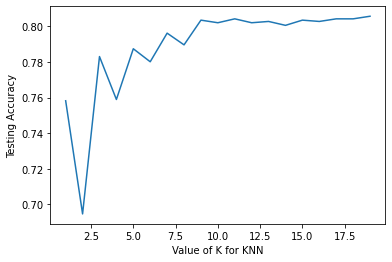

In [ ]:
# testing the model with values of k
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,Y_train)
        Y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(Y_test,Y_pred)
        scores_list.append(metrics.accuracy_score(Y_test,Y_pred))

# plotting accuracy
%matplotlib inline
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# finding the maximum score and its index of k
print(max(scores))

The best value of k to use to maximize accuracy of our model is 19. Let's rebuild the model now.

In [ ]:
# rebuilding the model with k = 19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X,Y)


KNeighborsClassifier(n_neighbors=19)

Now that we have fixed our model, let's run some predictions to test it.

In [ ]:
# building sample individuals to test the model
classes = {-1:'DidNotVote',1:'Voted'}
x_new = [[4,2,1,1,1,0],
         [3,3,0,1,0,50]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])



Voted
Voted


In testing the model, we see that both combinations of predictor variables are predicted to be voters. Let's now look at the confusion matrix of the model.

In [ ]:
# confusion matrix
confusion_matrix(Y, knn.predict(X))

array([[  71, 1110],
       [  36, 5624]])

Looking at the confusion matrix, we also see that this model produces a large number of false negatives. Let's now look at the model's score.

In [ ]:
# model score
round(knn.score(X_test, Y_test),2) * 100

81.0

The score of the logistic regression model is 81.0%, which is not a bad score, but also not incredibly high.

Next, we will look at a random forest model and assess its accuracy.


In [ ]:
# building the model
features = surveyData

labels = np.array(features['VotedRegular'])
features = features.drop('VotedRegular', axis = 1)

feature_list = list(features.columns)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(train_features, train_labels);


Now that we have built the model, let's test for error using the baseline of the 'Sexuality' variable.

In [ ]:
# building baseline and testing error
baseline_preds = test_features[:, feature_list.index('Sexuality')]
baseline_errors = abs(baseline_preds - test_labels)

print('Sexuality baseline error:', round(np.mean(baseline_errors), 2))


Sexuality baseline error: 0.59


The baseline error for 'Sexuality' is 0.59. Let's now find the mean absolute error and the accuracy of this model.

In [ ]:
# predicting
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%')



Mean Absolute Error: 0.52
Accuracy: 99.9 %


The mean absolute error is 0.52, and the accuracy is 99.9%. This random forest performs very well!

Now, let's visualize it. First, let's look at one estimator from the random forest.

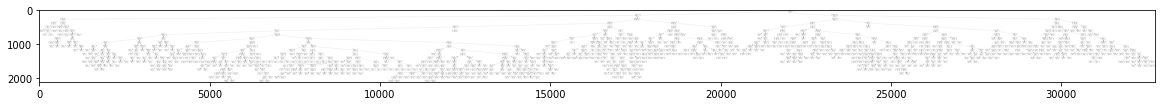

In [ ]:
# pulling out one tree from the forest
tree = rf.estimators_[5]

# exporting the image to a .dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# using .dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# writing .png file to a graph
graph.write_png('tree.png')

# displaying the graph
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)


This is very hard to read. Let's limit the tree depth to 2 levels for ease of understanding.

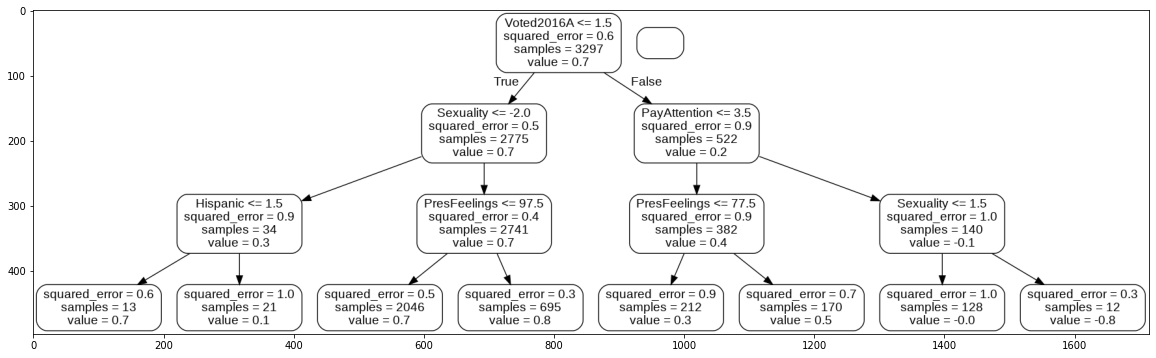

In [ ]:
# limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# extract the small tree
sm = rf_small.estimators_[5]

# save the tree as a .png image
export_graphviz(sm, out_file = 'sm.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('sm.dot')
graph.write_png('sm.png')

# visualizing the smaller tree
%matplotlib inline
img = cv2.imread('sm.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

This tree is easier to read. Now, let's look at the importance of each variable in the creation of the random forest model.

Variable: PresFeelings         Importance: 0.35
Variable: Voted2016A           Importance: 0.18
Variable: Party                Importance: 0.17
Variable: PayAttention         Importance: 0.16
Variable: Sexuality            Importance: 0.09
Variable: Hispanic             Importance: 0.06


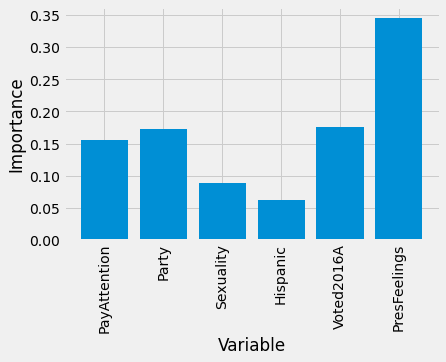

In [ ]:
# get numerical feature importances
importances = list(rf.feature_importances_)

# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# plotting the importances
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable');


Looking above, we can see that 'PresFeelings' is the most important variable in the model, followed by 'Voted2016A'. The least important variable is 'Hispanic'.

**CONCLUSION**

Looking at these models, we see that the random foreset is the most effective. However, both the K-Nearest Neighbor and Logistic Regression models also score fairly high, with roughly 81-83% accuracy. From these models, we can see which variables contribute the most to the model, and can run predictions each model to draw conclusions regarding specific individuals.

In conclusion, we see that though we may not be able to draw conclusions from the state-specific data comparing poverty, income, and Google search queries with voting trends across states, we are able to use three model types to predict voting habits given several explanatory variables. Though these models vary in efficiency and accuracy, they are all insightful in predicting and understanding voting trends, both in the November 2020 general election and beyond.

## **SOFTWARE DEMO**

In [ ]:
print("Welcome to my software demo! \n\nBelow you will have the opportunity to make a prediction on whether or not \nyou would have voted in the November 2020 general election.\n")

print("Please answer the following questions with the corresponding integer.\n")

print("How often do you pay attention to politics?\n\n1: Always\n2: Most of the time\n3: About half the time\n4: Some of the time\n5: Never\n")

inp1 = input(": ")

print("\nWhat party are you registered under?\n\n1: Democratic\n2: Republican\n3: Libertarian\n4: None/Independent\n5: Other\n")

inp2 = input(": ")

print("\nWhat is your sexual orientation?\n\n1: Heterosexual\n2: Homosexual\n3: Bisexual\n4: Other\n")

inp3 = input(": ")

print("\nDo you identify as Hispanic?\n\n0: No\n1: Yes\n")

inp4 = input(": ")

print("\nDid you vote in the 2016 general election?\n0: No\n1: Yes\n ")

inp5 = input(": ")

print("\nOn a scale of 0 to 100, how did you feel about President Donald Trump in November 2020?\n")

inp6 = input(": ")

## prediction for linear model
classes = {-1:'DidNotVote',1:'Voted'}
xInp = [[inp1,inp2,inp3,inp4,inp5,inp6]]
y_pred = model.predict(xInp)

print("\nUsing the linear regression model, we predict that: ")

if y_pred[0] == -1:
  print("You DID NOT vote in the 2020 general election.\n")

else:
  print("You DID vote in the 2020 general election.\n")


## prediction for KNN model
classes = {-1:'DidNotVote',1:'Voted'}
xInp = [[inp1,inp2,inp3,inp4,inp5,inp6]]
y_pred = knn.predict(xInp)

print("Using the K-Nearest Neighbors model, we predict that: ")

if y_pred[0] == -1:
  print("You DID NOT vote in the 2020 general election.\n")

else:
  print("You DID vote in the 2020 general election.\n")

Welcome to my software demo! 

Below you will have the opportunity to make a prediction on whether or not 
you would have voted in the November 2020 general election.

Please answer the following questions with the corresponding integer.

How often do you pay attention to politics?

1: Always
2: Most of the time
3: About half the time
4: Some of the time
5: Never

: 1

What party are you registered under?

1: Democratic
2: Republican
3: Libertarian
4: None/Independent
5: Other

: 1

What is your sexual orientation?

1: Heterosexual
2: Homosexual
3: Bisexual
4: Other

: 1

Do you identify as Hispanic?

0: No
1: Yes

: 1

Did you vote in the 2016 general election?
0: No
1: Yes
 
: 1

On a scale of 0 to 100, how did you feel about President Donald Trump in November 2020?

: 1

Using the linear regression model, we predict that: 
You DID vote in the 2020 general election.

Using the K-Nearest Neighbors model, we predict that: 
You DID vote in the 2020 general election.

